(rk2-derivation-section)=
# Derivation of Explicit Runge-Kutta Methods

The derivation of explicit Runge-Kutta methods is achieved by comparing the [Taylor series](taylor-series-section)  for the ODE $y'=f(t,y)$ to that of the [general Runge-Kutta method](rk-definition) and ensuring the coefficients $a_{ij}$, $b_i$ and $c_i$ match.

For example, consider the second-order Taylor series expansion of $y_{n+1}$

\begin{align*}
    y_{n+1} = y_n + h y_n' + \frac{h^2}{2} y_n'' + O(h^3).
\end{align*}

We wish to solve the ODE $y' = f(t,y)$, applying the <a href="https://en.wikipedia.org/wiki/Chain_rule" target="_blank">chain rule</a> to differentiate $y$ we have[^1]

[^1]: Here we are using subscript notation where $f_y(t, y) = \frac{\partial f}{\partial y}(t ,y)$ and similar for $f_t(t, y)$.

\begin{align*}
    y''(t, y) = f'(t, y) = f_t(t, y) + f_y(t, y) y'(t, y) = f_t(t, y) + f(t, y) f_y(t, y),
\end{align*}

then the Taylor series becomes

```{math}
:label: ode-taylor-equation
\begin{align*}
    y_{n+1} &= y_n + h f(t_n, y_n) + \frac{h^2}{2}(f_t(t_n, y_n) + f(t_n, y_n) f_y(t_n, y_n)) + O(h^3)
\end{align*}
```

This is the second-order Taylor series expansion for the ODE $y' = f(t,y)$. To be able to solve this ODE we need the Taylor series expansion of a Runge-Kutta method to be equivalent to equation {eq}`ode-taylor-equation`. Recall that the general form of a second-order explicit Runge-Kutta method is

\begin{align*}
    y_{n+1} &= y_n + h(b_1 k_1 + b_2 k_2), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + c_2 h, y_n + h a_{21} k_1)
\end{align*}

We can use the first-order expansion of the <a href="https://en.wikipedia.org/wiki/Taylor%27s_theorem#Taylor's_theorem_for_multivariate_functions" target="_blank">bivariate Taylor series</a>

\begin{align*}
    f(t + p, y + q) = f(t, y) + p f_t(t, y) + q f_y(t, y),
\end{align*}

to rewrite the $k_2$ term as

\begin{align*}
    k_2 &= f(t_n, y_n) + c_2 h f_t(t_n, y_n) + h a_{21} f(t_n, y_n) f_y(t_n, y_n).
\end{align*}

Substituting $k_1$ and $k_2$ into the expression for $y_{n+1}$ gives

```{math}
:label: bivariate-rk2-equation

\begin{align*}
y_{n+1} &= y_n + h (b_1 f(t_n, y_n) \\
& \qquad + b_2 (f(t_n, y_n) + c_2 h f_t(t_n, y_n) + h a_{21} f(t_n, y_n) f_y(t_n, y_n))) + O(h^3).
\end{align*}
```

We need equation {eq}`bivariate-rk2-equation` to be equal to {eq}`ode-taylor-equation`. Equating the coefficients of $f(t_n, y_n)$ we have

\begin{align*}
    h b_1 + h b_2 &= h \\
    \therefore b_1 + b_2 &= 1.
\end{align*}

Equating the coefficients of $f_t(t_n, y_n)$ we have

\begin{align*}
    h^2 b_2 c_2 &= \frac{h^2}{2}\\
    \therefore b_2c_2 &= \frac{1}{2},
\end{align*}

and equating the coefficients of $f(t_n, y_n) f_y(t_n, y_n)$ we have

\begin{align*}
    h^2 b_2 a_{21} &= \frac{h^2}{2} \\
    \therefore a_{21}b_2 &= \frac{1}{2}.
\end{align*}

So we have three equations and four unknowns ($a_{21}$, $b_1$, $b_2$, $c_2$). Any set of values that satisfy these this system of equations give a valid second-order explicit Runge-Kutta method. These conditions are known as the **order conditions** for a method. Since we have an <a href="https://en.wikipedia.org/wiki/Underdetermined_system" target="_blank">underdetermined system</a> to get a unique solution we choose a value for one of the unknowns and solve for the others. 

````{admonition} Definition: Order conditions for a second-order explicit Runge-Kutta method
:class: note
:name: rk2-order-conditions-definition

```{math}
:label: rk2-order-conditions-equation

\begin{align*}
    b_1 +b_2 &=1,\\
    c_2 b_2 &=\frac{1}{2},\\
    a_{21} b_2 &=\frac{1}{2}
\end{align*}
```
````

````{admonition} Example 2.2
:class: seealso
:name: rk2-derivation-example

Derive a second-order Runge-Kutta method where $c_2 = 1$.

**Solution**

Substituting $c_2 = 1$ into the [order conditions for a second-order explicit Runge-Kutta method](rk2-order-conditions-definition), the second order condition gives $b_2 = \frac{1}{2}$ so from the first order condition we know that $b_1 = \frac{1}{2}$ and from the third order condition we know that $a_{21} = 1$. So this second-order explicit Runge-Kutta method is

\begin{align*}
    y_{n+1} &=y_n +\frac{h}{2}(k_1 +k_2 ),\\
    k_1 &=f(t_n ,y_n ),\\
    k_2 &=f(t_n +h,y_n +hk_1 ),
\end{align*}

or expressed using a Butcher tableau

\begin{align*}
    \begin{array}{c|cc}
    0 & & \\
    1 & 1 & \\ \hline
    & \frac{1}{2} & \frac{1}{2}
    \end{array}
\end{align*}

This version of a second order Runge-Kutta method uses the simplest values for $a_{ij}$, $b_i$ and $c_i$ and is known as **the second-order Runge-Kutta method (RK2)**. 

````

```{note}
There are an infinite number of combinations for the values of $a_{ij}$, $b_i$ and $c_i$ which satisfy the order conditions for a Runge-Kutta method. All of the possible Runge-Kutta methods of a particular order will give similar solutions.
```

## Using Python to solve the order conditions

The algebra used to solve the order conditions in the [example](#rk2-derivation-example) above is quite easy to perform but for higher order methods it can soon get more complicated (see the [derivation of a fourth-order explicit Runge-Kutta method](#rk4-derivation-example) for an example) and it is therefore useful to use software to help with the algebra. There is a Python library called [**SymPy**](https://www.sympy.org/en/index.html) (short for *symbolic Python*) that has functions that can solve algebraic equations. 

The code below derives the second-order explicit Runge-Kutta method from the [example](#rk2-derivation-example) above using SymPy. After importing SymPy we need to declare each of the coefficients $a_{21}$, $b_1$, $b_2$ and $c_2$ as **symbolic variables** before setting $c_2=1$. Each order condition is then defined using the symbolic variables. Note that SymPy assumes that equations are equal to zero which is why we have subtracted the right-hand side from the left. We have also used the `Rational(1,2)` command for the fraction $\frac{1}{2}$ so that SymPy will output any fractional values as fractions rather than decimals. The system of three equations `eq1`, `eq2` and `eq3` is then solved using the `solve` command.

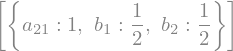

In [29]:
from sympy import *
init_printing()

# Declare symbolic variables
a21, b1, b2, c2 = symbols('a21, b1, b2, c2')
c2 = 1

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - Rational(1,2)
eq3 = a21 * b2 - Rational(1,2)

# Solve order conditions
solve((eq1, eq2, eq3))